In [ ]:
from google.colab import files
uploaded = files.upload()

Saving retails.xlsx to retails.xlsx


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline


In [ ]:
pip install squarify

In [ ]:
import squarify

In [ ]:
retails = pd.read_excel('retails.xlsx')

In [ ]:
retails.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
retails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
retails.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
#remove rows where Customer ID is null also drop duplicated rows in this step
retails = retails.dropna(subset=['CustomerID'], axis=0).drop_duplicates()

In [ ]:
retails.shape

(401604, 8)

In [ ]:
# convert some colums to the potentially correct data type
retails['InvoiceDate']=pd.to_datetime(retails['InvoiceDate'])
retails['CustomerID']= retails['CustomerID'].astype(int)
retails.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [ ]:
# Remove some transactions with negative quantity and some transactions can be filltered by InvoiceNo with letter "C"
cancelled = retails[retails['Quantity'] < 0]
cancelled ['Loss'] = cancelled['Quantity']*cancelled['UnitPrice']
cancelled

<ipython-input-13-b6def45bfcb6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancelled ['Loss'] = cancelled['Quantity']*cancelled['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Loss
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom,-1.25


In [ ]:
cancelled_df = cancelled.groupby(['InvoiceNo', 'Country', 'CustomerID']).agg({'InvoiceDate': 'max','Loss':'sum'}).reset_index()
cancelled_df

,InvoiceNo,Country,CustomerID,InvoiceDate,Loss
0,C536379,United Kingdom,14527,2010-12-01 09:41:00,-27.50
1,C536383,United Kingdom,15311,2010-12-01 09:49:00,-4.65
2,C536391,United Kingdom,17548,2010-12-01 10:24:00,-141.48
3,C536506,United Kingdom,17897,2010-12-01 12:38:00,-25.50
4,C536543,United Kingdom,17841,2010-12-01 14:30:00,-3.80
...,...,...,...,...,...
3649,C581484,United Kingdom,16446,2011-12-09 09:27:00,-168469.60
3650,C581490,United Kingdom,14397,2011-12-09 09:57:00,-32.53
3651,C581499,United Kingdom,15498,2011-12-09 10:28:00,-224.69
3652,C581568,United Kingdom,15311,2011-12-09 11:57:00,-54.75


In [ ]:
supplied = retails[retails['Quantity'] > 0]
supplied['InvoiceNo'] = supplied['InvoiceNo'].astype(int)
supplied['Revenue'] = supplied['Quantity']*supplied['UnitPrice']
supplied

<ipython-input-16-7c9603afbf84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supplied['InvoiceNo'] = supplied['InvoiceNo'].astype(int)
<ipython-input-16-7c9603afbf84>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supplied['Revenue'] = supplied['Quantity']*supplied['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [ ]:
supplied_df = supplied.groupby(['InvoiceNo', 'Country', 'CustomerID']).agg({'InvoiceDate':'max','Revenue':'sum'}).reset_index()
supplied_df

,InvoiceNo,Country,CustomerID,InvoiceDate,Revenue
0,536365,United Kingdom,17850,2010-12-01 08:26:00,139.12
1,536366,United Kingdom,17850,2010-12-01 08:28:00,22.20
2,536367,United Kingdom,13047,2010-12-01 08:34:00,278.73
3,536368,United Kingdom,13047,2010-12-01 08:34:00,70.05
4,536369,United Kingdom,13047,2010-12-01 08:35:00,17.85
...,...,...,...,...,...
18531,581583,United Kingdom,13777,2011-12-09 12:23:00,124.60
18532,581584,United Kingdom,13777,2011-12-09 12:25:00,140.64
18533,581585,United Kingdom,15804,2011-12-09 12:31:00,329.05
18534,581586,United Kingdom,13113,2011-12-09 12:49:00,339.20


In [ ]:
supplied_df.describe()

,InvoiceNo,CustomerID,Revenue
count,18536.000000,18536.000000,18536.000000
mean,559527.999407,15266.224158,479.456673
std,13040.283892,1734.178524,1677.916285
min,536365.000000,12346.000000,0.000000
25%,548352.500000,13773.500000,157.200000
50%,559818.500000,15176.500000,302.565000
75%,570834.500000,16779.000000,469.467500
max,581587.000000,18287.000000,168469.600000


In [ ]:
import datetime as dt
today = datetime.datetime.strptime('2011-12-31', '%Y-%m-%d')
today

datetime.datetime(2011, 12, 31, 0, 0)

In [ ]:
#caculate R, F, M
data = supplied_df[['CustomerID','InvoiceNo','InvoiceDate', 'Revenue']]
rfm = data.groupby(['CustomerID']).agg({'InvoiceDate':'max','InvoiceNo':'count','Revenue':'sum'}).reset_index()
rfm.columns = ['CustomerID','LastPurchaseDate','Frequency','Monetary']

#Tính Redency
rfm['Recency'] = (today - rfm['LastPurchaseDate']).dt.days
rfm

,CustomerID,LastPurchaseDate,Frequency,Monetary,Recency
0,12346,2011-01-18 10:01:00,1,77183.60,346
1,12347,2011-12-07 15:52:00,7,4310.00,23
2,12348,2011-09-25 13:13:00,4,1797.24,96
3,12349,2011-11-21 09:51:00,1,1757.55,39
4,12350,2011-02-02 16:01:00,1,334.40,331
...,...,...,...,...,...
4334,18280,2011-03-07 09:52:00,1,180.60,298
4335,18281,2011-06-12 10:53:00,1,80.82,201
4336,18282,2011-12-02 11:43:00,2,178.05,28
4337,18283,2011-12-06 12:02:00,16,2045.53,24


In [ ]:
rfm.drop('LastPurchaseDate',axis = 1)
rfm

,CustomerID,LastPurchaseDate,Frequency,Monetary,Recency
0,12346,2011-01-18 10:01:00,1,77183.60,346
1,12347,2011-12-07 15:52:00,7,4310.00,23
2,12348,2011-09-25 13:13:00,4,1797.24,96
3,12349,2011-11-21 09:51:00,1,1757.55,39
4,12350,2011-02-02 16:01:00,1,334.40,331
...,...,...,...,...,...
4334,18280,2011-03-07 09:52:00,1,180.60,298
4335,18281,2011-06-12 10:53:00,1,80.82,201
4336,18282,2011-12-02 11:43:00,2,178.05,28
4337,18283,2011-12-06 12:02:00,16,2045.53,24


In [ ]:
rfm['Recency'] = -rfm['Recency']
quantiles = rfm.quantile(q=[0.2,0.4,0.6,0.8])
print(quantiles)
quantiles.to_dict()

     CustomerID  Frequency  Monetary  Recency
0.2     13505.6        1.0   248.844   -200.0
0.4     14708.2        2.0   487.118    -92.0
0.6     15882.8        3.0   933.202    -53.0
0.8     17080.4        6.0  2054.820    -34.2


<ipython-input-29-9064c2863eb5>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quantiles = rfm.quantile(q=[0.2,0.4,0.6,0.8])


{'CustomerID': {0.2: 13505.6, 0.4: 14708.2, 0.6: 15882.8, 0.8: 17080.4},
 'Frequency': {0.2: 1.0, 0.4: 2.0, 0.6: 3.0, 0.8: 6.0},
 'Monetary': {0.2: 248.84400000000002,
  0.4: 487.118,
  0.6: 933.2019999999999,
  0.8: 2054.82},
 'Recency': {0.2: -200.0, 0.4: -92.0, 0.6: -53.0, 0.8: -34.19999999999982}}

In [ ]:
# RFM segment; x:value, r:redency
def FMscore(x,r,d):
  if x<= d[r][0.2]:
    return 1
  elif x <= d[r][0.4]:
    return 2
  elif x <= d[r][0.6]:
    return 3
  elif x <= d[r][0.8]:
    return 4
  else:
    return 5

In [ ]:
#RFM table
rfm_segmentation = rfm
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(FMscore, args=('Recency',quantiles))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMscore, args=('Frequency',quantiles))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMscore, args=('Monetary',quantiles))

rfm_segmentation['RFM_Score'] = rfm_segmentation.R_Quartile.map(str) + rfm_segmentation.F_Quartile.map(str) + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation['RFM_Score'] = rfm_segmentation['RFM_Score'].astype(int)
rfm_segmentation.reset_index()
rfm_segmentation.head()

,CustomerID,LastPurchaseDate,Frequency,Monetary,Recency,R_Quartile,F_Quartile,M_Quartile,RFM_Score
0,12346,2011-01-18 10:01:00,1,77183.60,-346,1,1,5,115
1,12347,2011-12-07 15:52:00,7,4310.00,-23,5,5,5,555
2,12348,2011-09-25 13:13:00,4,1797.24,-96,2,4,4,244
3,12349,2011-11-21 09:51:00,1,1757.55,-39,4,1,4,414
4,12350,2011-02-02 16:01:00,1,334.40,-331,1,1,2,112


In [ ]:
rfm_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        4339 non-null   int64         
 1   LastPurchaseDate  4339 non-null   datetime64[ns]
 2   Frequency         4339 non-null   int64         
 3   Monetary          4339 non-null   float64       
 4   Recency           4339 non-null   int64         
 5   R_Quartile        4339 non-null   int64         
 6   F_Quartile        4339 non-null   int64         
 7   M_Quartile        4339 non-null   int64         
 8   RFM_Score         4339 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 305.2 KB


In [ ]:
seg = pd.read_excel('retails.xlsx',sheet_name = 'Segmentation')
seg.columns = ['Segment','RFM_Score']
seg

,Segment,RFM_Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [ ]:
seg['RFM_Score'] = seg['RFM_Score'].str.split(',')
seg = seg.explode('RFM_Score').reset_index(drop=True)
seg['RFM_Score'] = seg['RFM_Score'].astype(int)
seg.sort_values(by='RFM_Score')
seg

,Segment,RFM_Score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
...,...,...
120,Lost customers,112
121,Lost customers,121
122,Lost customers,131
123,Lost customers,141


In [ ]:
rfm_seg = rfm_segmentation.merge(seg, how = 'left', on='RFM_Score')
rfm_seg

,CustomerID,LastPurchaseDate,Frequency,Monetary,Recency,R_Quartile,F_Quartile,M_Quartile,RFM_Score,Segment
0,12346,2011-01-18 10:01:00,1,77183.60,-346,1,1,5,115,Cannot Lose Them
1,12347,2011-12-07 15:52:00,7,4310.00,-23,5,5,5,555,Champions
2,12348,2011-09-25 13:13:00,4,1797.24,-96,2,4,4,244,At Risk
3,12349,2011-11-21 09:51:00,1,1757.55,-39,4,1,4,414,Promising
4,12350,2011-02-02 16:01:00,1,334.40,-331,1,1,2,112,Lost customers
...,...,...,...,...,...,...,...,...,...,...
4334,18280,2011-03-07 09:52:00,1,180.60,-298,1,1,1,111,Lost customers
4335,18281,2011-06-12 10:53:00,1,80.82,-201,1,1,1,111,Lost customers
4336,18282,2011-12-02 11:43:00,2,178.05,-28,5,2,1,521,Promising
4337,18283,2011-12-06 12:02:00,16,2045.53,-24,5,5,4,554,Champions


In [ ]:
df = rfm_seg.groupby('Segment').agg({'CustomerID':'count','Monetary':'sum'}).reset_index()
df.columns = ['Segment','Num_customer','Monetary']
df

,Segment,Num_customer,Monetary
0,About To Sleep,232,90305.950
1,At Risk,360,709564.761
2,Cannot Lose Them,128,240365.320
3,Champions,789,5478616.490
4,Hibernating customers,669,268232.192
5,Lost customers,569,125016.290
6,Loyal,408,1022274.700
7,Need Attention,244,302155.341
8,New Customers,400,89103.630
9,Potential Loyalist,304,192415.610


In [ ]:
df['cus_seg'] = df['Num_customer']/df['Num_customer'].sum()
df['mon_seg'] = df['Monetary']/df['Monetary'].sum()
df

,Segment,Num_customer,Monetary,cus_seg,mon_seg
0,About To Sleep,232,90305.950,0.053469,0.010161
1,At Risk,360,709564.761,0.082968,0.079841
2,Cannot Lose Them,128,240365.320,0.029500,0.027046
3,Champions,789,5478616.490,0.181839,0.616461
4,Hibernating customers,669,268232.192,0.154183,0.030182
5,Lost customers,569,125016.290,0.131136,0.014067
6,Loyal,408,1022274.700,0.094031,0.115028
7,Need Attention,244,302155.341,0.056234,0.033999
8,New Customers,400,89103.630,0.092187,0.010026
9,Potential Loyalist,304,192415.610,0.070062,0.021651


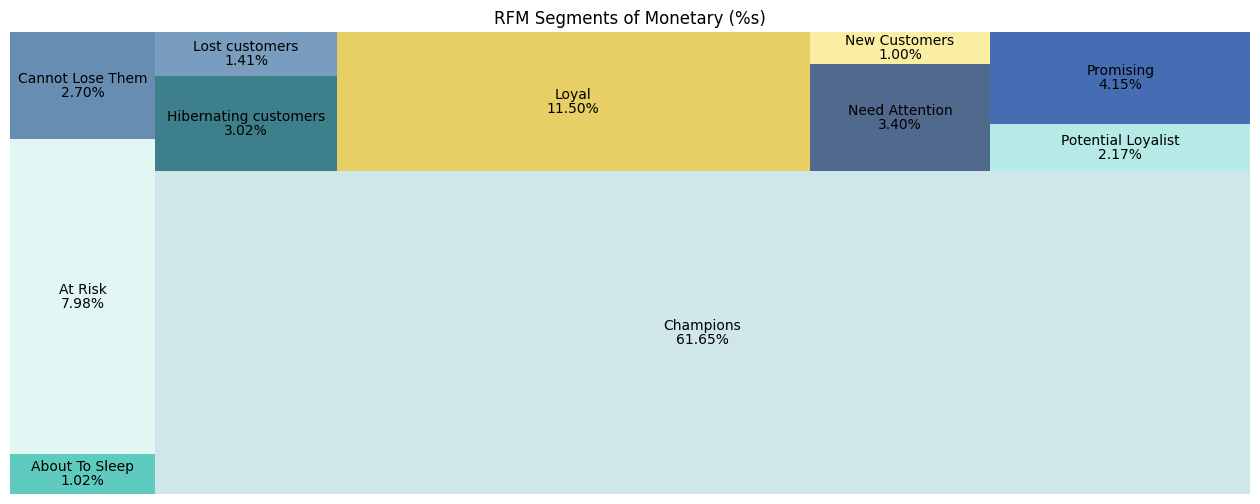

In [ ]:
colors = ['#37BEB0', '#DBF5F0', '#41729F', '#C3E0E5', '#0C6170', '#5885AF', '#E1C340', '#274472', '#F8EA8C', '#A4E5E0', '#1848A0']

fig, ax = plt.subplots(figsize=(16,6))
squarify.plot(sizes=df['mon_seg'],
              label=df['Segment'],
              value=[f'{x*100:.2f}%' for x in df['mon_seg']] ,
              alpha=.8, color=colors)
ax.set_title('RFM Segments of Monetary (%s)')
plt.axis('off')
plt.show()

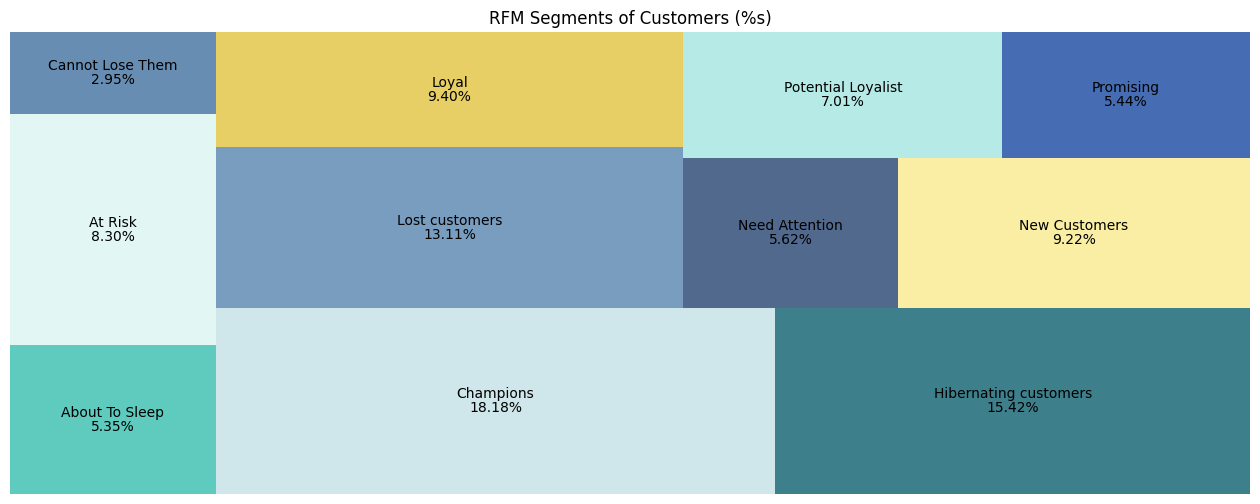

In [ ]:
colors = ['#37BEB0', '#DBF5F0', '#41729F', '#C3E0E5', '#0C6170', '#5885AF', '#E1C340', '#274472', '#F8EA8C', '#A4E5E0', '#1848A0']

fig, ax = plt.subplots(figsize=(16,6))
squarify.plot(sizes=df['cus_seg'],
              label=df['Segment'],
              value=[f'{x*100:.2f}%' for x in df['cus_seg']] ,
              alpha=.8, color=colors)
ax.set_title('RFM Segments of Customers (%s)')
plt.axis('off')
plt.show()

**Insights:**
1. Qua biểu đồ, các khách hàng nhóm "Champions" chiếm tỷ lệ cao nhất. Đây là nhóm mua hàng thường xuyên và có sức mua cao => nhóm khách hàng trọng tâm, có thể thúc đẩy việc mua hàng cho nhóm khách hàng này bằng các quyền lợi đặc biệt hơn(ví dụ: khách hàng VIP, được ưu tiên mua hàng trước, chiết khấu cao hơn, các service khi mua hàng, chính sách cskh sau mua hàng...)
2. Nhóm Loyal - chiếm 7.4%: Đặc điểm của nhóm khách hàng này là có sức mua tương đối tốt và thường xuyên mua hàng => cần đẩy mạnh hơn để có thể đưa nhóm khách hàng này lên mức Champion (có thể nghiên cứu về sở thích tiêu dùng của nhóm này, gợi ý về các sản phẩm có chất lượng với mức chi cao hơn, nâng dần mức chiết khấu với đơn hàng lớn...)
3. Nhóm Potential Loyalist - chiếm 15.8%, tỷ lệ này tương đối cao so, khách hàng thường xuyên mua hàng nhưng mức chi ko cao => chiến để thúc đẩy về mức chi cho nhóm khách hàng này (thẻ khách hàng để tạo sự thân thiết, mối quan hệ; xin đánh giá về sản phẩm đã dùng, nghiên cứu về sở thích và lý do mức chi chưa cao)
4. New Customer - 3.96%: chiếm tỷ lệ thấp, nhóm này là các khách hàng mới tiếp cận sản phẩm, brand của cty => nâng mức nhận diện brand cho nhóm khách hàng này.
5. Promissing - 5.85%: Tỷ lệ nhóm khách hàng này ko cao, có thể duy trì hoặc thúc đẩy hơn, nhóm khách hàng này có sức chi tốt nhưng tỷ lệ mua hàng không thường xuyên => chăm sóc sau mua hàng, đánh giá về sản phẩm đã dùng, có thể có những chương trình riêng về dùng thử sp mới... để tăng mức ghé thăm cửa hàng.
6. Need Attention - 6.06%: những kh mới mua hàng gần đây và có mức chi khá tốt, tỷ lệ mua hàng thường xuyên => cần tập trung chăm sóc để có thể xếp các kh này vào nhóm Loyal hoặc Champion, tỷ lệ hiện tại tương đối nhỏ so với benefit nhóm này mang lại (nâng cao về việc cskh sau mua, lợi ích khi mua hàng như tiếp cận các sp thuận lợi, sớm hơn; chiết khấu; tạo quan hệ thana thiết hơn)
7. About to sleep - 6.98%: nhóm các khách hàng cũ, tần suất mua hàng tương đối thường xuyên nhưng có mức chi thấp gần giống như nhóm New Customer nhưng khoảng thời gian sau mua hàng lớn => có nguy cơ rời bỏ => tăng mức độ nhận diện với sản phẩm, chăm sóc sau mua hàng, tạo mối quan hệ
8. At Risk: 9.73% - nhóm khách hàng có mức chi tương đối ổn định, chi thường xuyên nhưng có khoảng thời gian mua hàng gần nhất lớn; ngoài ra tỷ lệ của nhóm này khá cao (10%) => cần kết nối với các khách hàng này để tăng độ nhận diện hơn, gợi ý mua hàng theo sở thích, benefit khi mua hàng, chính sách về giá...
9. Cannot Lose Them - 5.95%: Mức chi khá tốt và thường xuyên nhưng chưa mua hàng tiếp trong khoảng thời gian dài => chính sách như đối với nhóm At Risk
10. Hibernating customers - 13.48%: Nhóm khách hàng chi ít, không thường xuyên, thời gian mua hàng gần nhất khá lâu => tỷ lệ nhóm khách hàng này cao, chỉ sau nhóm Champion => cần chú ý đặc biêtk và có chính sách về giá, tăng độ nhận diện nhiều hơn và connect với khách hàng thường xuyên hơn
11. Lost customer: tỷ lệ nhỏ (1%); mức chi, tần suất và lần mua hàng gần nhất rất lâu => có thể bỏ qua




---

